In [28]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [29]:
read_location = "../data/CSCourseEnrollmentFinal.csv"
pivot_save_location = "../data/pivot_CSCurriculumFinal.csv"
log_save_location = "../data/log_CSCurriculumFinal.csv"

In [30]:
df = pd.read_csv(read_location)

In [31]:
# assign id to each row
df['id'] = range(1, len(df) + 1)
df

,Semester Admitted,Major,Department,CSCI101_Pass_Sem,CSCI101_Tran_Sem,CSCI128_Pass_Sem,CSCI128_Tran_Sem,CSCI200_Pass_C_Sem,CSCI200_Tran_Sem,CSCI210_Pass_Sem,...,CSCI448_Pass_Sem,CSCI455_Pass_Sem,CSCI470_Pass_Sem,CSCI471_Pass_Sem,CSCI473_Pass_Sem,CSCI474_Pass_Sem,CSCI475_Pass_Sem,CSCI477_Pass_Sem,CSCI478_Pass_Sem,id
0,Fall 2018,Computer Science,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2019,NaN,NaN,1
1,Spring 2018,Operations Research w/Enginrng,Economics and Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,Fall 2018,Computer Science,Computer Science,Fall 2018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Fall 2019,Fall 2019,NaN,NaN,NaN,NaN,NaN,3
3,Spring 2024,STEM Education,Honors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Summer 2021,Computer Science,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7344,Fall 2023,Computer Science,Computer Science,NaN,NaN,Fall 2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7345
7345,Fall 2023,Computer Science,Computer Science,NaN,NaN,Fall 2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7346
7346,Spring 2024,Computer Science,Computer Science,NaN,NaN,NaN,Spring 2024,NaN,Spring 2024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7347
7347,Spring 2024,Mechanical Engineering,Mechanical Engineering,NaN,NaN,NaN,Spring 2024,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7348


In [32]:
# Updated function to handle both abbreviation and full name patterns
def update_majors_and_specialties(row):

    # maps abbreviation to full name
  
    core_major_map = {
        'EE': 'Electrical Engineering',
        'CS': 'Computer Science',
        'CHE': 'Chemical Engineering',
        'CHM': 'Chemistry',
        'EG': 'Engineering General',
        'Mechanical Eng': 'Mechanical Engineering',
        'Mech Eng' : 'Mechanical Engineering',
        'Geological Engineering' : 'Geological Engineering',
        'Economics' : 'Economics',
    }

    # Check for direct full name matches first (e.g., "Mechanical Eng - {specialty}")
    for full_name in core_major_map.values():
        if row['Major'].startswith(full_name):
            specialty_part = row['Major'].replace(full_name, '').strip(' -').replace('Spclty', '')
            row['Specialty'] = specialty_part if specialty_part else "N/A"
            row['Major'] = full_name
            return row

    # Fallback to abbreviation-based extraction
    for abbreviation, full_name in core_major_map.items():
        if row['Major'].startswith(abbreviation):
            # Extract the specialty assuming it follows the abbreviation and '-' (or the full name and '-')
            if '-' in row['Major']:
                specialty_part = row['Major'].split('-', 1)[-1].strip().replace('Spclty', '')
                row['Specialty'] = specialty_part if specialty_part else "N/A"
            else:
                row['Specialty'] = "N/A"
            row['Major'] = full_name
            return row

    # For majors that don't match any pattern
    if row['Specialty'] == "N/A":  # If the specialty hasn't been set by the above logic
        # This assumes there are majors that are already correctly named and don't have specialties
        row['Specialty'] = "N/A"

    return row

In [33]:
df['Specialty'] = "N/A"
# Major and Department as string
df['Major'] = df['Major'].astype(str)
df['Department'] = df['Department'].astype(str)
df = df.apply(update_majors_and_specialties, axis=1)
display(df)

# output value counts of Major Specialty to a text file
with open('../other/major_specialty_count_id.txt', 'w') as f:
    f.write(df[['Major', 'Specialty', 'Department']].value_counts().to_string())

,Semester Admitted,Major,Department,CSCI101_Pass_Sem,CSCI101_Tran_Sem,CSCI128_Pass_Sem,CSCI128_Tran_Sem,CSCI200_Pass_C_Sem,CSCI200_Tran_Sem,CSCI210_Pass_Sem,...,CSCI455_Pass_Sem,CSCI470_Pass_Sem,CSCI471_Pass_Sem,CSCI473_Pass_Sem,CSCI474_Pass_Sem,CSCI475_Pass_Sem,CSCI477_Pass_Sem,CSCI478_Pass_Sem,id,Specialty
0,Fall 2018,Computer Science,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Fall 2019,NaN,NaN,1,N/A
1,Spring 2018,Operations Research w/Enginrng,Economics and Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,N/A
2,Fall 2018,Computer Science,Computer Science,Fall 2018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Fall 2019,Fall 2019,NaN,NaN,NaN,NaN,NaN,3,N/A
3,Spring 2024,STEM Education,Honors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,N/A
4,Summer 2021,Computer Science,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7344,Fall 2023,Computer Science,Computer Science,NaN,NaN,Fall 2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7345,N/A
7345,Fall 2023,Computer Science,Computer Science,NaN,NaN,Fall 2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7346,N/A
7346,Spring 2024,Computer Science,Computer Science,NaN,NaN,NaN,Spring 2024,NaN,Spring 2024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7347,N/A
7347,Spring 2024,Mechanical Engineering,Mechanical Engineering,NaN,NaN,NaN,Spring 2024,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7348,N/A


In [34]:
# pivot table from wide to long
melted_df = pd.melt(df, id_vars=['Semester Admitted', 'Department', 'Major', 'id', 'Specialty'], var_name='Class_Semester', value_name='Taken')

# filter out NaN rows
melted_df = melted_df.dropna(subset=['Taken', 'Department', 'Major'])

# split 'Class_Semester' into 'Class' and 'Semester'
melted_df[['Class', 'Semester_Type']] = melted_df['Class_Semester'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Class_Semester'])

# split Semester_Type into Pass or Tran
melted_df[['Type', 'Garbage']] = melted_df['Semester_Type'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Garbage', 'Semester_Type'])

# split taken 
melted_df[['Taken_Semester', 'Taken_Year']] = melted_df['Taken'].str.rsplit(' ', n=1, expand=True)
melted_df[['Admitted_Semester', 'Admitted_Year']] = melted_df['Semester Admitted'].str.rsplit(' ', n=1, expand=True)

# Display the first few rows to verify
melted_df.sort_values(by='id').head(10)

,Semester Admitted,Department,Major,id,Specialty,Taken,Class,Type,Taken_Semester,Taken_Year,Admitted_Semester,Admitted_Year
117584,Fall 2018,Computer Science,Computer Science,1,N/A,Fall 2018,CSCI358,Pass,Fall,2018,Fall,2018
146980,Fall 2018,Computer Science,Computer Science,1,N/A,Fall 2019,CSCI442,Pass,Fall,2019,Fall,2018
139631,Fall 2018,Computer Science,Computer Science,1,N/A,Fall 2020,CSCI406,Pass,Fall,2020,Fall,2018
433591,Fall 2018,Computer Science,Computer Science,1,N/A,Fall 2019,CSCI475,Pass,Fall,2019,Fall,2018
80840,Spring 2018,Economics and Business,Operations Research w/Enginrng,2,N/A,Fall 2019,CSCI262,Pass,Fall,2019,Spring,2018
139632,Spring 2018,Economics and Business,Operations Research w/Enginrng,2,N/A,Spring 2019,CSCI406,Pass,Spring,2019,Spring,2018
146982,Fall 2018,Computer Science,Computer Science,3,N/A,Fall 2019,CSCI442,Pass,Fall,2019,Fall,2018
286613,Fall 2018,Computer Science,Computer Science,3,N/A,Spring 2019,CSCI404,Pass,Spring,2019,Fall,2018
117586,Fall 2018,Computer Science,Computer Science,3,N/A,Fall 2019,CSCI358,Pass,Fall,2019,Fall,2018
249868,Fall 2018,Computer Science,Computer Science,3,N/A,Summer 2019,MATH332,Pass,Summer,2019,Fall,2018


In [35]:
# output value counts of Major Specialty to a text file
with open('../other/major_specialty_count_class.txt', 'w') as f:
    f.write(melted_df[['Major', 'Specialty', 'Department']].value_counts().to_string())

In [36]:
# remove messed up admit dates
melted_df = melted_df.astype({'Taken_Year': 'int32', 'Admitted_Year': 'int32'})

UNIQUE_SEM = 4
melted_df['Taken_Num'] = np.select([
    melted_df['Taken_Semester'] == 'Spring',
    melted_df['Taken_Semester'] == 'Summer One',
    melted_df['Taken_Semester'] == 'Summer Two',
    melted_df['Taken_Semester'] == 'Summer',
    melted_df['Taken_Semester'] == 'Fall'
    ], 
    [melted_df['Taken_Year'] * UNIQUE_SEM, 
    melted_df['Taken_Year'] * UNIQUE_SEM + 1, 
    melted_df['Taken_Year'] * UNIQUE_SEM + 2,
    melted_df['Taken_Year'] * UNIQUE_SEM + 1,
    melted_df['Taken_Year'] * UNIQUE_SEM + 3], 
    default = 'UNKNOWN')

melted_df['Admitted_Num'] = np.select([
    melted_df['Admitted_Semester'] == 'Spring',
    melted_df['Admitted_Semester'] == 'Summer One',
    melted_df['Admitted_Semester'] == 'Summer Two',
    melted_df['Admitted_Semester'] == 'Summer',
    melted_df['Admitted_Semester'] == 'Fall'
    ], 
    [melted_df['Admitted_Year'] * UNIQUE_SEM, 
    melted_df['Admitted_Year'] * UNIQUE_SEM + 1, 
    melted_df['Admitted_Year'] * UNIQUE_SEM + 2,
    melted_df['Admitted_Year'] * UNIQUE_SEM + 1,
    melted_df['Admitted_Year'] * UNIQUE_SEM + 3], 
    default = 'UNKNOWN')

In [37]:
# remove invalid admit dates
invalids = melted_df[melted_df['Taken_Num'] < melted_df['Admitted_Num']]
invalid_ids = invalids['id'].unique()
melted_df = melted_df[~melted_df['id'].isin(invalid_ids)]

In [38]:
# replace equivalent classes
melted_df['Class'] = melted_df['Class'].replace('CSCI101', 'CSCI128') # Intro CS
melted_df['Class'] = melted_df['Class'].replace('CSCI261', 'CSCI200') # Programming Concepts
melted_df['Class'] = melted_df['Class'].replace('CSCI262', 'CSCI220') # Data Structures and Algorithms
melted_df['Class'] = melted_df['Class'].replace('MATH122', 'MATH112').replace('MATH113', 'MATH112') # Calc II
melted_df['Class'] = melted_df['Class'].replace('MATH214', 'MATH213').replace('MATH223', 'MATH213').replace('MATH224','MATH213') # Calc III
melted_df['Class'] = melted_df['Class'].replace('MATH235', 'MATH225') # DiffEq
melted_df['Class'] = melted_df['Class'].replace('MATH342', 'MATH332') # Linear Algebra

# Validation

In [39]:
print("DEPARTMENTS:")
print("\t", melted_df['Department'].unique(), '\n')

print("MAJORS:")
print("\t", melted_df['Major'].unique(), '\n')

print("CLASSES:")
print("\t", melted_df['Class'].unique(), '\n')

print("SEMESTERS:")
print("\t", melted_df['Taken_Year'].unique(), '\n')

DEPARTMENTS:
	 ['Computer Science' 'Electrical Enginrg & Comp Sci'
 'Electrical Engineering' 'Civil & Environmental Enginrng'
 'Mechanical Engineering' 'Economics and Business'
 'Chemical & Biological Engineer' 'Physics' 'Interdisciplinary Program'
 'Applied Math & Statistics' 'Geophysics' 'Chemistry'
 'Engineering Design & Society' 'Metallurgical & Materials Eng'
 'Petroleum' 'Geo & Geological Engineering' 'Undecided'
 'Non-Degree Program Grad Level' 'nan' 'Mining' 'Honors'
 'Non-Degree Program Undergrad' 'Humanities Arts Social Science'] 

MAJORS:
	 ['Computer Science' 'Electrical Engineering' 'Civil Engineering'
 'Mechanical Engineering' 'Business Eng & Mngmt Sci'
 'Chemical Engineering' 'Engineering Physics' 'Quantum Engineering'
 'Economics' 'Computational & Applied Math' 'Advanced Energy Systems'
 'Environmental Engineering' 'Robotics' 'Geophysics' 'Biochemistry'
 'Data Science' 'Statistics' 'ChemEng - Biological Specialty'
 'Geophysical Engineering' 'Engineering General'
 'Engin

In [40]:
# save to .csv
melted_df.to_csv(pivot_save_location, index=False)

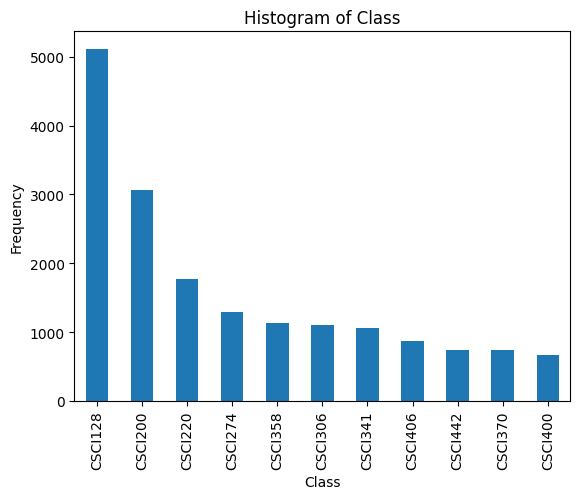

In [52]:
# plot histogram of different Classes 
melted_df['Class'].value_counts().plot(kind='bar')
plt.title('Histogram of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

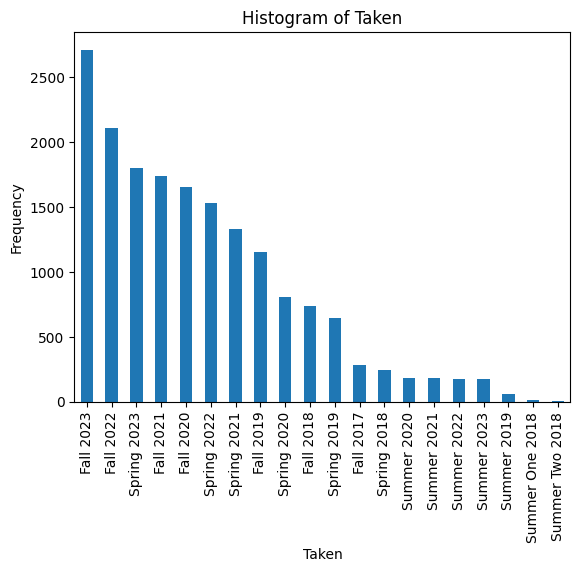

In [53]:
# plot histogram of different Semesters
melted_df['Taken'].value_counts().plot(kind='bar')
plt.title('Histogram of Taken')
plt.xlabel('Taken')
plt.ylabel('Frequency')
plt.show()

# Logit Manipulation

In [54]:
# remove duplicates from melted_df
melted_df = melted_df.drop_duplicates(subset=['id', 'Class', 'Taken', 'Type'])

In [55]:
unique_ids = melted_df['id'].unique()
unique_sems = melted_df['Taken'].unique()
unique_classes = melted_df['Class'].unique()

print(unique_ids)
print(1 in unique_ids)

[ 134  135  137 ... 6605 7081 7157]
False


In [56]:
id_list = []
for id in unique_ids:
    for i in range(len(unique_classes) * len(unique_sems)):
        id_list.append(id)

class_list = []
for id in unique_ids: 
    for cl in unique_classes:
        for i in range(len(unique_sems)):
            class_list.append(cl)

sem_list = []
for i in range(len(unique_ids) * len(unique_classes)):
    for sem in unique_sems:
        sem_list.append(sem)

In [57]:
print(len(id_list), len(class_list), len(sem_list))

1294480 1294480 1294480


In [58]:
log_df = pd.DataFrame({'id': id_list, 'Class': class_list, 'Taken': sem_list})
log_df

,id,Class,Taken
0,134,CSCI128,Fall 2017
1,134,CSCI128,Spring 2018
2,134,CSCI128,Spring 2019
3,134,CSCI128,Fall 2018
4,134,CSCI128,Fall 2020
...,...,...,...
1294475,7157,CSCI442,Summer 2020
1294476,7157,CSCI442,Summer One 2018
1294477,7157,CSCI442,Fall 2023
1294478,7157,CSCI442,Summer 2019


In [59]:
# match on id
melted_df['unique_id'] = melted_df['id'].astype(str) + '_' + melted_df['Taken'].astype(str) + '_' + melted_df['Class'].astype(str)
log_df['unique_id'] = log_df['id'].astype(str) + '_' + log_df['Taken'].astype(str) + '_' + log_df['Class'].astype(str)
log_df['boolean'] = log_df['unique_id'].isin(melted_df['unique_id'])

In [60]:
# drop duplicate unique_id rows in melted_df
melted_df = melted_df.drop_duplicates(subset=['unique_id'])

In [61]:
print(len(log_df[log_df['boolean'].astype(str) == 'True'])) 
print(len(melted_df))

for tag in ['Class', 'Taken', 'unique_id']:
    log_classes = log_df[tag].unique().sort()
    melted_classes = melted_df[tag].unique().sort()
    print(f"Same {tag}?", log_classes == melted_classes)

17524
17524
Same Class? True
Same Taken? True
Same unique_id? True


In [62]:
print(len(log_df['Class'].unique()) * len(log_df['Taken'].unique()) * len(log_df['id'].unique()))
print(len(melted_df['id'].unique()) * len(melted_df['Taken'].unique()) * len(melted_df['Class'].unique()))

1294480
1294480


In [63]:
# save logit dataframe to .csv
log_df.to_csv(log_save_location, index=False)